In [3]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline

# database 
import psycopg2
import config as creds

In [ ]:
#connecting to database 

In [ ]:
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
print(conn_string)

In [ ]:
conn = psycopg2.connect(conn_string)

In [ ]:
covid_df = pd.read_sql_query(
                   ''' SELECT * FROM coviddata 
                   ''' , conn)

In [ ]:
covid_df

In [8]:
df = pd.read_csv('../Data/cleaned_data.csv')

Question 1: Is Age a factor in determining high risk mortality? 

In [10]:
#Create df with relevant columns to compare
age_plot = df[['Mean Age','Mortality']]
age_plot;

In [11]:
# Assign X and y variables
X = age_plot[["Mean Age"]]
y = age_plot[["Mortality"]]
print(X.shape, y.shape)

(1156, 1) (1156, 1)


Text(0.5, 1.0, 'Age vs Mortality')

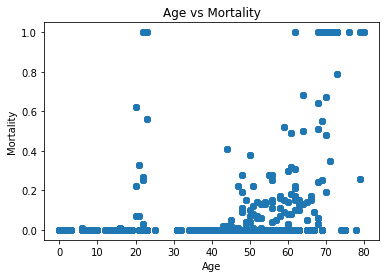

In [12]:
#Plot  
plt.scatter(X,y)
plt.xlabel('Age')
plt.ylabel('Mortality')
plt.title('Age vs Mortality')

In [76]:
# Split data for test/train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [77]:
# Import KMeans with 6 clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [78]:
# Fit test values to model 
kmeans.fit(X_test, y_test)

KMeans(n_clusters=6)

In [79]:
# Find predicted clusters
predicted_clusters = kmeans.predict(X_test)

In [80]:
# Calculate for centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_


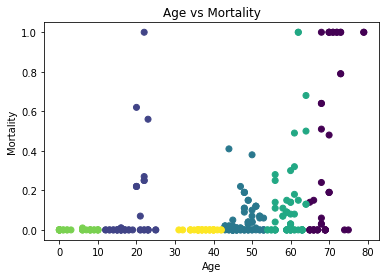

In [81]:
# Print clusters 
plt.scatter(X_test, y_test, c = labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Mortality')
plt.title('Age vs Mortality')
plt.savefig('../static/pltImages/ageRisk.png')

In [82]:
X_test, predicted_clusters, y_test;

In [83]:
# Create new dataframe with age 
risk_age = pd.DataFrame(X_test)

In [84]:
# Reset index 
risk_age.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [85]:
# Add predicted clusters to dataframe 
predicted_clusters =pd.DataFrame(predicted_clusters)
risk_age['predicted_clusters']=predicted_clusters

In [86]:
# Add mortality to datafrmae 
risk_age['Mortality']= y_test

In [87]:
# group by clusters 
grouped = risk_age.groupby(by=["predicted_clusters"])

In [88]:
# find average mortality rate by clusters 
mort = grouped.mean('Mortality')

In [89]:
# rename columns 
new_mort = mort.rename(columns={'Mortality':'AvgMortality'})

In [90]:
# min age per clusters and rename columns 
minimum = grouped.min('Mean Age')
new_min = minimum.rename(columns={'Mean Age':'MinAge'})

In [91]:
# max age per clusters and rename columns 
maximum = grouped.max('Mean Age')
new_max = maximum.rename(columns={'Mean Age':'MaxAge'})

In [92]:
# Group 0 age 54-64 with mortality of 0.100147
# Group 1 age 12-25 with mortality of 0.094681
# Group 2 

In [93]:
# combine into single df 
combined_df=pd.concat([new_mort, new_min, new_max],axis=1)
combined_df

,Mean Age,AvgMortality,MinAge,Mortality,MaxAge,Mortality
predicted_clusters,,,,,,
0,69.326087,0.371087,65,0.0,79,1.00
1,18.511628,0.086047,12,0.0,25,1.00
2,47.662500,0.044125,43,0.0,53,0.41
3,59.627119,0.117119,54,0.0,64,1.00
4,4.333333,0.000333,0,0.0,10,0.01
5,37.290323,0.000000,31,0.0,42,0.00


In [94]:
# grab relevant columsn to compare and sort 
results = combined_df[['MinAge','MaxAge','AvgMortality']]
end_results = results.sort_values(by=['AvgMortality'])
end_results

,MinAge,MaxAge,AvgMortality
predicted_clusters,,,
5,31,42,0.000000
4,0,10,0.000333
2,43,53,0.044125
1,12,25,0.086047
3,54,64,0.117119
0,65,79,0.371087


In [ ]:
# end of question 1 

In [ ]:
 #vaccine recommendations? Why ages 12-25 higher mortality? 
# possible mental illness and also socializing via covid parties etc... 

In [47]:
# print as csv 
end_results.to_csv ('../static/pltImages/ageRisk.csv', header=True)